In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame

import seaborn as sns

%matplotlib inline

In [2]:
df_data = pd.read_excel('2. DA&V - Data Interpretation (Case Study).xlsx','DATA')

In [3]:
df_data.head()

,Customer_ID,Store Number,Customer Segment,First Name,Last Name,Address,City,State,Zip,Visits,Spend
0,10,100,Home Office,PAMELA,WRIGHT,2316 E 5TH AVE,DENVER,CO,80206,1,206.95
1,100,100,Consumer,MELISSA,RUFF,2753 S MILWAUKEE ST,DENVER,CO,80210,1,228.27
2,1000,104,Small Business,CONSTANTI,VLASSIS,16911 E HARVARD AVE,AURORA,CO,80013,1,432.44
3,1002,104,Home Office,AMY,LOCKEMER,3721 S PITKIN CT,AURORA,CO,80013,4,2101.11
4,1003,101,Home Office,DANELL,VALDEZ,2925 W COLLEGE AVE,DENVER,CO,80219,1,1404.09


In [4]:
q1_data = df_data.groupby(['Customer Segment'])['Spend'].mean()
q1_data

Customer Segment
Consumer          3370.850304
Corporate         3436.910808
Home Office       3349.000326
Small Business    2789.541618
Name: Spend, dtype: float64

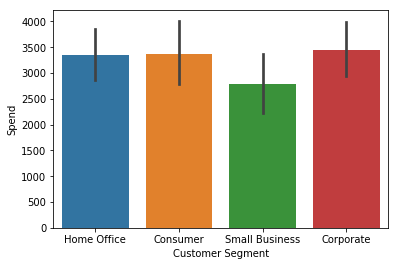

In [5]:
sns.barplot(df_data['Customer Segment'],df_data['Spend'])

In [6]:
q2_data = df_data[df_data['Customer Segment'] == 'Small Business']
q2_data.groupby('Store Number').max()['Visits']

Store Number
100    20
101    21
102     8
103    17
104    15
105    11
106     8
107     7
108    11
109     8
Name: Visits, dtype: int64

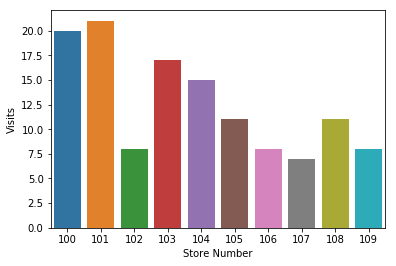

In [7]:
q2_gb = q2_data.groupby('Store Number').max()['Visits']
sns.barplot(q2_gb.index,q2_gb)

In [8]:
q3_data = df_data[df_data['Visits']>=2]
q3_data.head()

,Customer_ID,Store Number,Customer Segment,First Name,Last Name,Address,City,State,Zip,Visits,Spend
3,1002,104,Home Office,AMY,LOCKEMER,3721 S PITKIN CT,AURORA,CO,80013,4,2101.11
5,1005,107,Small Business,JESSICA,RINEHART,4220 W 35TH AVE,DENVER,CO,80212,2,962.61
6,1006,104,Small Business,NANCY,CLARK,8785 CLOVERLEAF CIR,PARKER,CO,80134,4,552.53
8,1009,104,Corporate,DENISE,PENTICO,4125C S EVANSTON CIR,AURORA,CO,80014,2,7026.44
9,101,100,Consumer,ERNA,ARUSTAMYAN,1137 S BOSTON CT,DENVER,CO,80247,2,1838.64


In [9]:
q3_data.groupby('Customer Segment')['Customer_ID'].count()

Customer Segment
Consumer          348
Corporate         642
Home Office       449
Small Business    352
Name: Customer_ID, dtype: int64

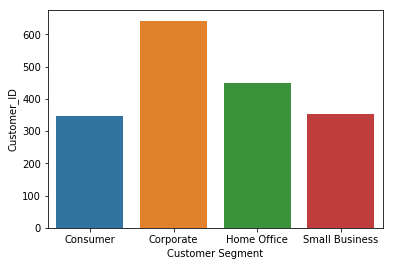

In [16]:
q3_gb = q3_data.groupby('Customer Segment')['Customer_ID'].count()
sns.barplot(q3_gb.index,q3_gb)

In [11]:
df_data['Spend per Visit'] = df_data['Spend']/df_data['Visits']

In [19]:
DataFrame(df_data.groupby('Customer_ID')['Spend per Visit'].mean().sort_values(ascending = False).head(10))

,Spend per Visit
Customer_ID,
794,15503.700000
1610,12163.610000
35,10880.440000
2507,10180.010000
1166,10020.480000
1733,9780.450000
1583,9629.910000
2842,9360.466667
2189,8803.298000


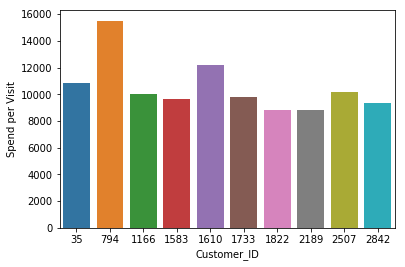

In [17]:
q4_gb = df_data.groupby('Customer_ID')['Spend per Visit'].mean().sort_values(ascending = False).head(10)
sns.barplot(q4_gb.index,q4_gb)

In [13]:
df_data[df_data['Customer_ID']==794]

,Customer_ID,Store Number,Customer Segment,First Name,Last Name,Address,City,State,Zip,Visits,Spend,Spend per Visit
2484,794,109,Corporate,DORIS,PURVIS,145 GARNET ST,BROOMFIELD,CO,80020,1,15503.7,15503.7


In [14]:
set(df_data[df_data['Store Number']==100]['City'])

{'ARVADA', 'AURORA', 'COMMERCE CITY', 'DENVER', 'ENGLEWOOD', 'LITTLETON'}

In [15]:
df_data[df_data['City']=='DENVER']['Store Number'].nunique()

10

In [32]:
df_data.groupby('City')[['Store Number','Visits','Spend per Visit']].agg({'Store Number':'nunique','Visits':'sum','Spend per Visit':'mean'}).sort_values('Visits')

,Store Number,Visits,Spend per Visit
City,,,
HENDERSON,1,3,176.610000
BRIGHTON,2,7,225.423333
CASTLE ROCK,1,9,327.160556
LONE TREE,2,16,2068.169119
BOULDER,1,18,776.309111
LAFAYETTE,2,19,220.630405
MORRISON,2,28,804.174286
THORNTON,2,37,601.376389
LOUISVILLE,3,48,484.586355
